# London Bike Sharing Data Analysis

In [1]:
import pandas as pd

In [3]:
df = pd.read_csv("bike.csv")

In [4]:
df.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


In [5]:
df.tail()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
17409,2017-01-03 19:00:00,1042,5.0,1.0,81.0,19.0,3.0,0.0,0.0,3.0
17410,2017-01-03 20:00:00,541,5.0,1.0,81.0,21.0,4.0,0.0,0.0,3.0
17411,2017-01-03 21:00:00,337,5.5,1.5,78.5,24.0,4.0,0.0,0.0,3.0
17412,2017-01-03 22:00:00,224,5.5,1.5,76.0,23.0,4.0,0.0,0.0,3.0
17413,2017-01-03 23:00:00,139,5.0,1.0,76.0,22.0,2.0,0.0,0.0,3.0


In [6]:
# exploring the data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   timestamp     17414 non-null  object 
 1   cnt           17414 non-null  int64  
 2   t1            17414 non-null  float64
 3   t2            17414 non-null  float64
 4   hum           17414 non-null  float64
 5   wind_speed    17414 non-null  float64
 6   weather_code  17414 non-null  float64
 7   is_holiday    17414 non-null  float64
 8   is_weekend    17414 non-null  float64
 9   season        17414 non-null  float64
dtypes: float64(8), int64(1), object(1)
memory usage: 1.3+ MB


In [8]:
df.shape

(17414, 10)

In [9]:
# finding the null values

df.isnull().sum()

timestamp       0
cnt             0
t1              0
t2              0
hum             0
wind_speed      0
weather_code    0
is_holiday      0
is_weekend      0
season          0
dtype: int64

In [10]:
# count the unique values in the weather_code column

df.weather_code.value_counts()

weather_code
1.0     6150
2.0     4034
3.0     3551
7.0     2141
4.0     1464
26.0      60
10.0      14
Name: count, dtype: int64

In [11]:
# count the unique values in the season column

df.season.value_counts()

season
0.0    4394
1.0    4387
3.0    4330
2.0    4303
Name: count, dtype: int64

In [13]:
# change the column names

new_col_dict ={
    'timestamp':'time',
    'cnt':'count', 
    't1':'temp_real_C',
    't2':'temp_feels_like_C',
    'hum':'humidity_percent',
    'wind_speed':'wind_speed_kph',
    'weather_code':'weather',
    'is_holiday':'is_holiday',
    'is_weekend':'is_weekend',
    'season':'season'
}

df.rename(new_col_dict, axis=1, inplace=True)

In [14]:
df.head()

,time,count,temp_real_C,temp_feels_like_C,humidity_percent,wind_speed_kph,weather,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


In [17]:
# changing the humidity values to percentage (i.e. a value between 0 and 1)

df.humidity_percent = df.humidity_percent / 100

In [18]:
df["humidity_percent"]

0        0.00930
1        0.00930
2        0.00965
3        0.01000
4        0.00930
          ...   
17409    0.00810
17410    0.00810
17411    0.00785
17412    0.00760
17413    0.00760
Name: humidity_percent, Length: 17414, dtype: float64

In [20]:
# creating a season dictionary so that we can map the integers 0-3 to the actual written values


season_dict = {
    '0.0':'spring',
    '1.0':'summer',
    '2.0':'autumn',
    '3.0':'winter'
}

# creating a weather dictionary so that we can map the integers to the actual written values

weather_dict = {
    '1.0':'Clear',
    '2.0':'Scattered clouds',
    '3.0':'Broken clouds',
    '4.0':'Cloudy',
    '7.0':'Rain',
    '10.0':'Rain with thunderstorm',
    '26.0':'Snowfall'
}

# changing the seasons column data type to string

df.season = df.season.astype('str')

# mapping the values 0-3 to the actual written seasons

df.season = df.season.map(season_dict)

# changing the weather column data type to string

df.weather = df.weather.astype('str')

# mapping the values to the actual written weathers

df.weather = df.weather.map(weather_dict)

In [21]:
df.head()

,time,count,temp_real_C,temp_feels_like_C,humidity_percent,wind_speed_kph,weather,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,0.00930,6.0,Broken clouds,0.0,1.0,winter
1,2015-01-04 01:00:00,138,3.0,2.5,0.00930,5.0,Clear,0.0,1.0,winter
2,2015-01-04 02:00:00,134,2.5,2.5,0.00965,0.0,Clear,0.0,1.0,winter
3,2015-01-04 03:00:00,72,2.0,2.0,0.01000,0.0,Clear,0.0,1.0,winter
4,2015-01-04 04:00:00,47,2.0,0.0,0.00930,6.5,Clear,0.0,1.0,winter


In [23]:
# writing the final dataframe to an excel file that we will use in our Tableau visualisations. The file will be the 'london_bikes_final.xlsx' file and the sheet name is 'Data'

df.to_excel('london_bikes_final.xlsx', sheet_name='Data')

In [24]:
df.columns

Index(['time', 'count', 'temp_real_C', 'temp_feels_like_C', 'humidity_percent',
       'wind_speed_kph', 'weather', 'is_holiday', 'is_weekend', 'season'],
      dtype='object')

In [25]:
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sb

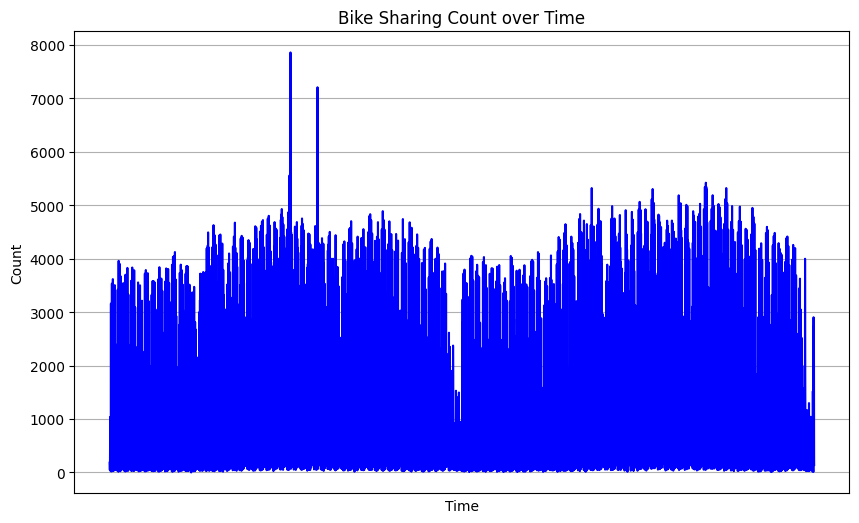

In [27]:
# Analysis of Bike Sharing Count over Time

plt.figure(figsize=(10, 6))
plt.plot(df['time'], df['count'], color='blue')
plt.title('Bike Sharing Count over Time')
plt.xlabel('Time')
plt.ylabel('Count')
plt.grid(True)
plt.xticks([])

plt.show()

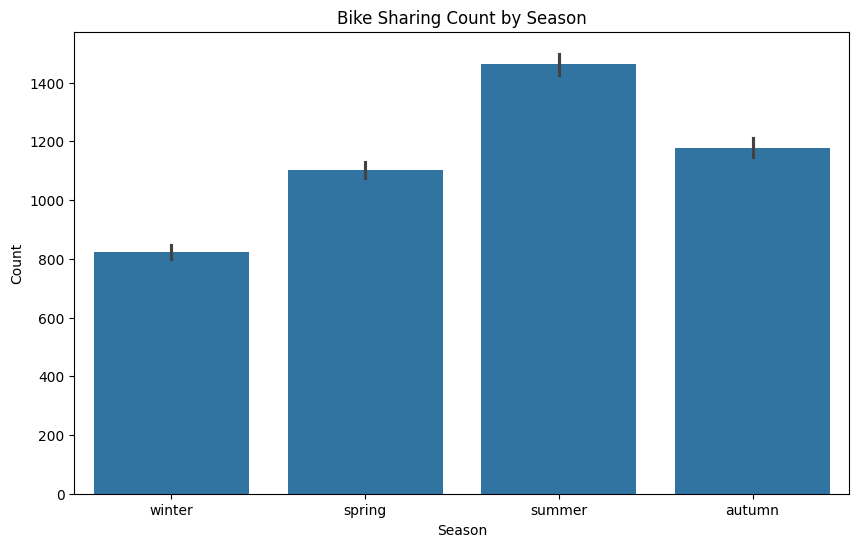

In [29]:
# Analysis of Bike Sharing Count by Season

plt.figure(figsize=(10, 6))
sb.barplot(data=df, x='season', y='count')
plt.title('Bike Sharing Count by Season')
plt.xlabel('Season')
plt.ylabel('Count')
plt.show()